# Introduction

- The purpose of this project is to elevate the big five personality traits (Openness to experience, Conscientiousness, Extraversion, Agreeableness, Neuroticism) https://www.verywell.com/the-big-five-personality-dimensions-2795422. In relation to gender difference between males and females.

- The second part of this project is to look at the differences between males and females and investigate whether there is a significant difference.

- This data comes from the Open Source Psychometrics Project (https://openpsychometrics.org).

- This dataset consists of 19720 participants (11985 females and 7608 males).

#Raw file
http://openpsychometrics.org/_rawdata/BIG5.zip

#Website
https://openpsychometrics.org/tests/IPIP-BFFM/

In [1]:
library(ggplot2)
library(car)
library(dplyr)


Attaching package: ‘dplyr’

The following object is masked from ‘package:car’:

    recode

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
pd <- read.csv("/home/james/Downloads/data.csv", header= TRUE)

In [3]:
head(pd)

race,age,engnat,gender,hand,source,country,E1,E2,E3,⋯,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
3,53,1,1,1,1,US,4,2,5,⋯,4,1,3,1,5,1,4,2,5,5
13,46,1,2,1,1,US,2,2,3,⋯,3,3,3,3,2,3,3,1,3,2
1,14,2,2,1,1,PK,5,1,1,⋯,4,5,5,1,5,1,5,5,5,5
3,19,2,2,1,1,RO,2,5,2,⋯,4,3,5,2,4,2,5,2,5,5
11,25,2,2,1,2,US,3,1,3,⋯,3,1,1,1,3,1,3,1,5,3
13,31,1,2,1,2,US,1,5,2,⋯,4,2,1,3,3,5,5,4,5,3


- The scores for each of the five traits need to be summed into a new total score.

- There are four different variables used for gender (1=Male, 2=Female, 3=Other 0=missed). This project is only looking at males and females, the other two variables (Other and missed) were removed using the subset function.

In [4]:
pd$Extraversion  <- rowSums(pd[ ,8:17])
pd$Neuroticism  <- rowSums(pd[ ,18:27])
pd$Agreeableness  <- rowSums(pd[ ,28:37])
pd$Conscientiousness  <- rowSums(pd[ ,38:47])
pd$Openness  <- rowSums(pd[ ,48:57])

In [5]:
female <- subset(pd, pd$gender == "2")
male <- subset(pd, pd$gender == "1")
pd <- rbind(female, male)
pd$Sex<- car::recode(pd$gender,"1='M'; 2='F'")

# Gender difference in personality

- These five density plots show personality differences between males and females. The blue overlay is male and the red overlay is female.
- The lines on each graph represent the mean score (Males are blue and Females are red).
- Note: higher or lower score on each item do not signify positive or negative traits.

# Openness to experience

Openness to experience is a trait associated with insight, imagination, creativity and adventure.

https://www.psychologistworld.com/influence-personality/openness-to-experience-trait

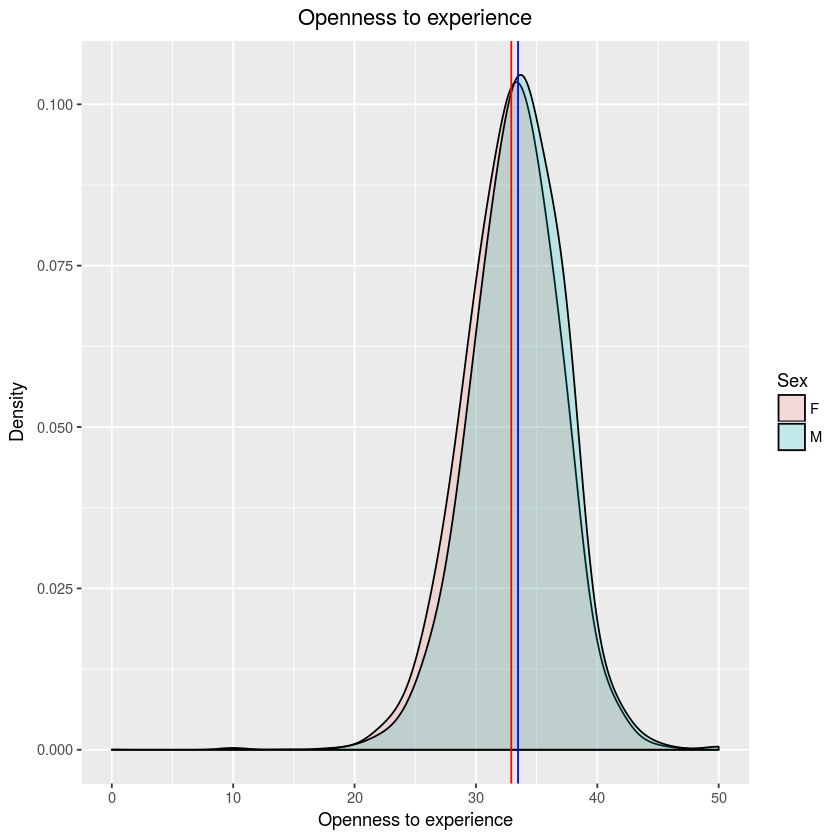

In [6]:
ggplot(data=pd, aes(x= Openness, fill= Sex)) + 
  geom_density(alpha=0.2, adjust=2) + 
  geom_vline(xintercept = mean(male$Openness), colour = "blue") +
  geom_vline(xintercept = mean(female$Openness), colour = "red") +
  xlab("Openness to experience") +
  ylab("Density") +
  ggtitle("Openness to experience") +
  theme(plot.title = element_text(hjust = 0.5))

# Conscientiousness

Conscientiousness is a personality trait associated with thoughtfulness, impulse control and goal-directed behaviour.

https://www.psychologistworld.com/influence-personality/conscientiousness-personality-trait

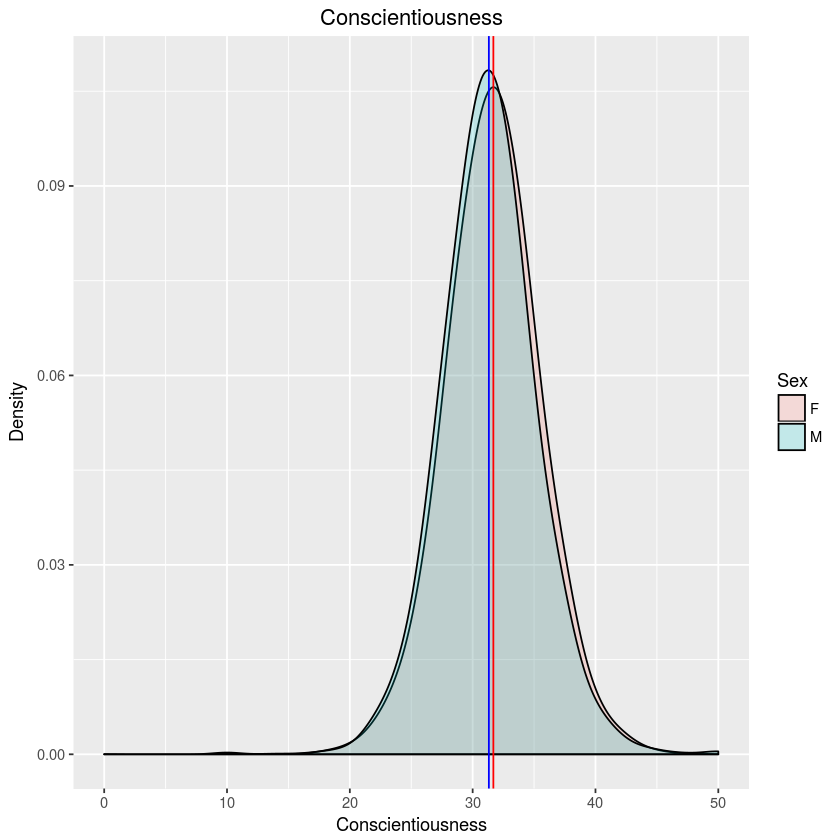

In [7]:
ggplot(data=pd, aes(x= Conscientiousness, fill= Sex)) + 
  geom_density(alpha=0.2, adjust=2) + 
  geom_vline(xintercept = mean(male$Conscientiousness), colour = "blue") +
  geom_vline(xintercept = mean(female$Conscientiousness), colour = "red") +
  xlab("Conscientiousness") +
  ylab("Density") +
  ggtitle("Conscientiousness") +
  theme(plot.title = element_text(hjust = 0.5))

# Extraversion

Extraversion is a personality trait that is associated with assertiveness, emotional, expression, talkative, sociable and excitability.

https://www.psychologistworld.com/influence-personality/extraversion-introversion

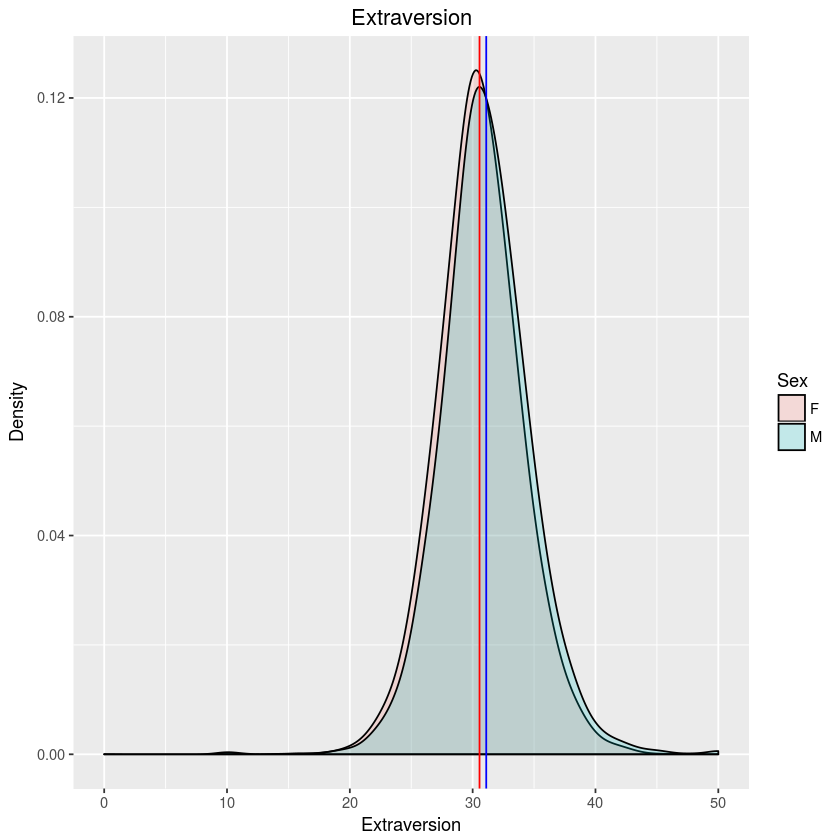

In [8]:
ggplot(data = pd, aes(x= Extraversion, fill= Sex)) + 
  geom_density(alpha=0.2, adjust=2) +
  geom_vline(xintercept = mean(male$Extraversion), colour = "blue") +
  geom_vline(xintercept = mean(female$Extraversion), colour = "red") +
  xlab("Extraversion") +
  ylab("Density") +
  ggtitle("Extraversion") +
  theme(plot.title = element_text(hjust = 0.5))

# Agreeableness

Agreeableness is a personality trait that is associated with trust, kindness and affection.

https://www.psychologistworld.com/personality/agreeableness-personality-trait

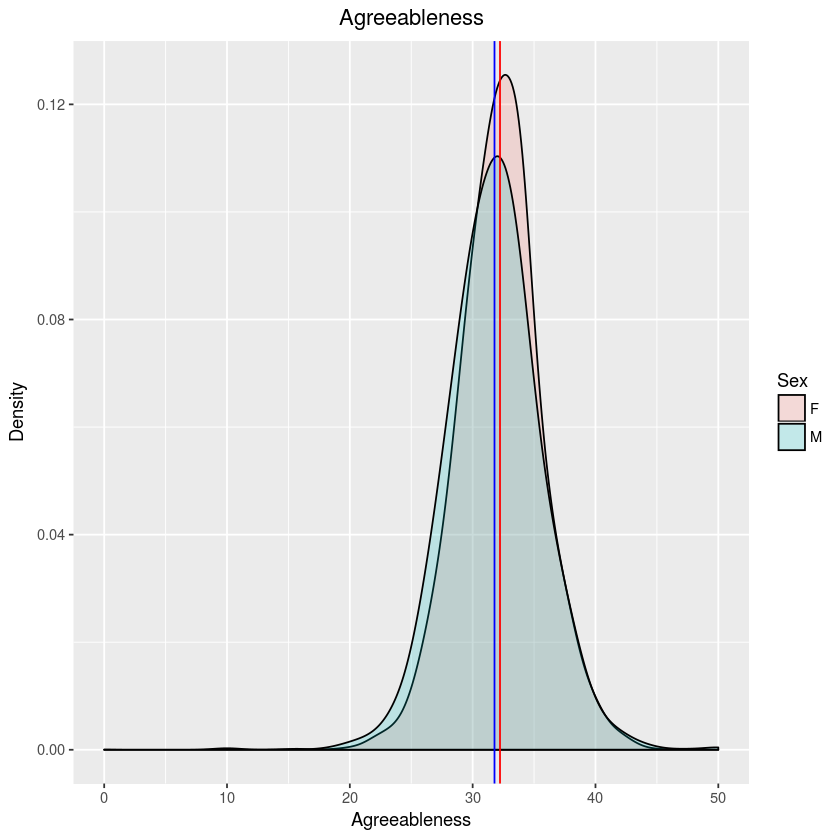

In [9]:
ggplot(data=pd, aes(x= Agreeableness, fill= Sex)) + 
  geom_density(alpha=0.2, adjust=2) + 
  geom_vline(xintercept=mean(male$Agreeableness), colour = "blue") +
  geom_vline(xintercept=mean(female$Agreeableness), colour = "red") +
  xlab("Agreeableness") +
  ylab("Density") +
  ggtitle("Agreeableness") +
  theme(plot.title = element_text(hjust = 0.5))

#  Neuroticism

Neuroticism is a personality trait that is associated with emotional instability, anxiety, irritability and sadness.

https://www.psychologistworld.com/personality/neuroticism-personality-trait

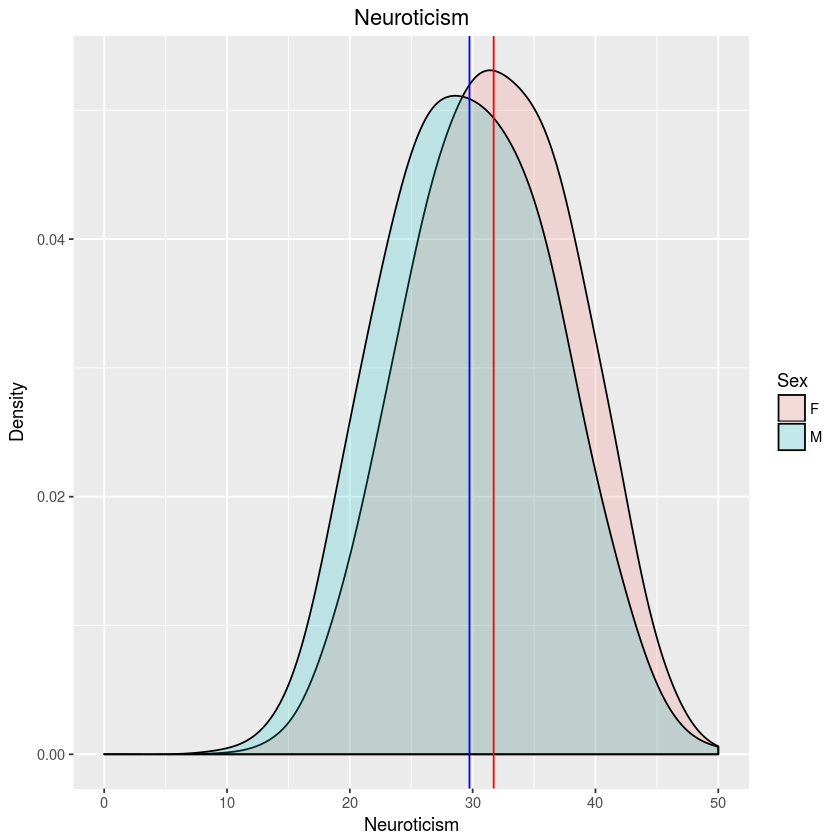

In [10]:
ggplot(data = pd, aes(x= Neuroticism, fill = Sex)) +
  geom_density(alpha=0.2, adjust=2) +
  geom_vline(xintercept = mean(male$Neuroticism), colour = "blue") +
  geom_vline(xintercept = mean(female$Neuroticism), colour = "red") +
  xlab("Neuroticism") +
  ylab("Density") +
  ggtitle("Neuroticism") +
  theme(plot.title = element_text(hjust = 0.5))

This data shows that female had a higher average score for Conscientiousness, agreeableness and Neuroticism. Whereas, males had a higher average score for Openness to experience and Extraversion.

# Analysis

The second part of this project is to investigate whether the difference displayed in the plots above are significant, Therefore, is there a significant difference between Male and Female personality types?

In [11]:
model <- manova(cbind(Openness, Conscientiousness, Extraversion, Agreeableness, Neuroticism) ~ gender, data = pd)
summary.aov(model)

 Response Openness :
               Df Sum Sq Mean Sq F value    Pr(>F)    
gender          1   1462 1462.07  99.599 < 2.2e-16 ***
Residuals   19591 287586   14.68                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response Conscientiousness :
               Df Sum Sq Mean Sq F value    Pr(>F)    
gender          1    624  623.62  41.524 1.192e-10 ***
Residuals   19591 294223   15.02                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response Extraversion :
               Df Sum Sq Mean Sq F value    Pr(>F)    
gender          1   1393  1392.9  113.22 < 2.2e-16 ***
Residuals   19591 241015    12.3                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response Agreeableness :
               Df Sum Sq Mean Sq F value    Pr(>F)    
gender          1    941  940.61  75.385 < 2.2e-16 ***
Residuals   19591 244443   12.48                      
---
Signif. codes:  0 ‘***’ 0.001 

This MANOVA model shows that there is a significant difference for each of the five personality types between males and females. This model would indicate that the most significant differences are Extraversion and Neuroticism.

# Conclusion

In summary, the data shows that there are significant differences between each of the five personality traits between males and females. Furthermore, the model would indicate that all personality traits are significantly different, although, the most significant traits are Extraversion and Neuroticism with males having higher levels of Extraversion and females having higher levels of Neuroticism